#      <center>        Telco Customer Churn  </center>
### <center>   Irene SUNNY | Ru YI | Shuqi DENG | Wenjing ZHAO  </center>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

!pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV

!pip install tensorflow keras
import tensorflow as tf
from tensorflow import keras

## Reading and Familiarising the Dataset

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4338,9708-HPXWZ,Male,1,No,No,5,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,No,Credit card (automatic),45.40,214.75,No
5202,8591-TKMZH,Male,0,Yes,Yes,59,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Mailed check,111.10,6555.2,No
6104,7356-AYNJP,Female,0,No,No,4,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,23.90,97.5,No
3548,0670-ANMUU,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,One year,No,Credit card (automatic),97.65,6687.85,No
4161,4223-WOZCM,Male,1,No,No,2,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,49.95,107.1,No


In [ ]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.shape

(7043, 20)

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
def print_unique_col_values(df1):
    for column in df1:
        if df1[column].dtypes=='object':
            print(f'{column}:{df1[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


## Exploratory Data Analysis (EDA)


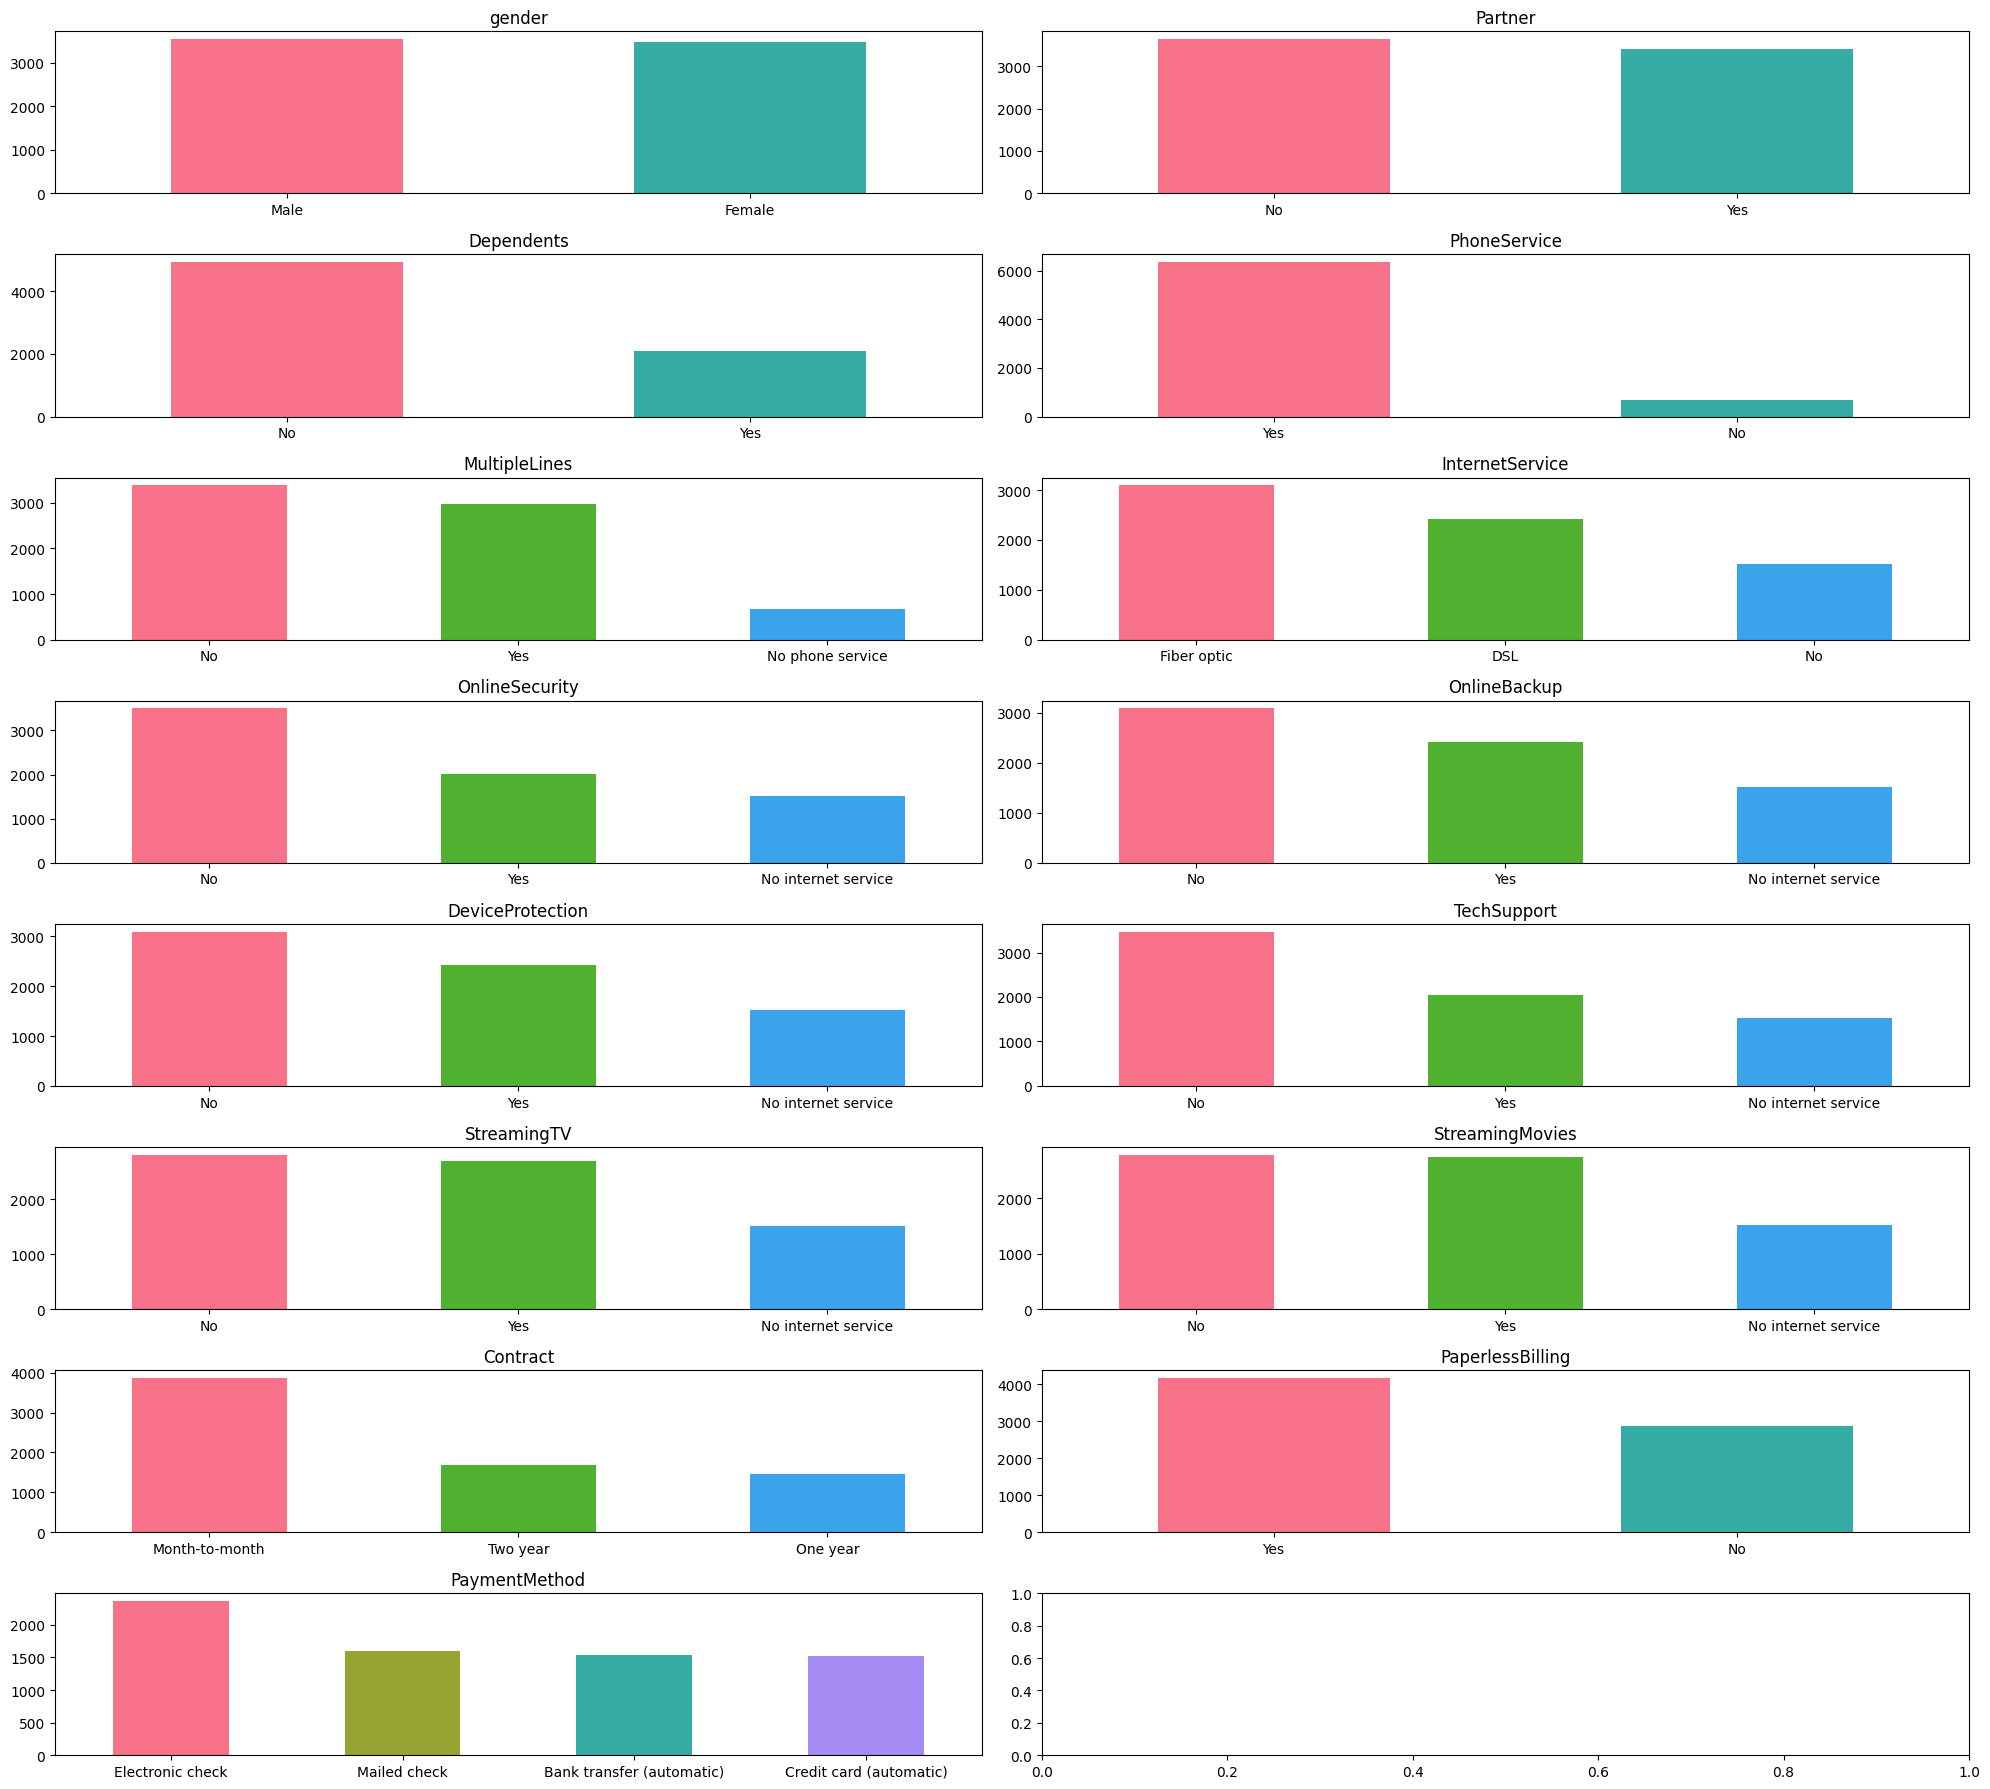

In [ ]:
# visualising the distribution of data for each variable

services = ['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 18))

for i, item in enumerate(services):
    colors = sns.color_palette('husl', len(df1[item].value_counts()))
    row, col = i // 2, i % 2
    ax = df1[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0, color=colors)
    ax.set_title(item)

plt.tight_layout()
plt.show()


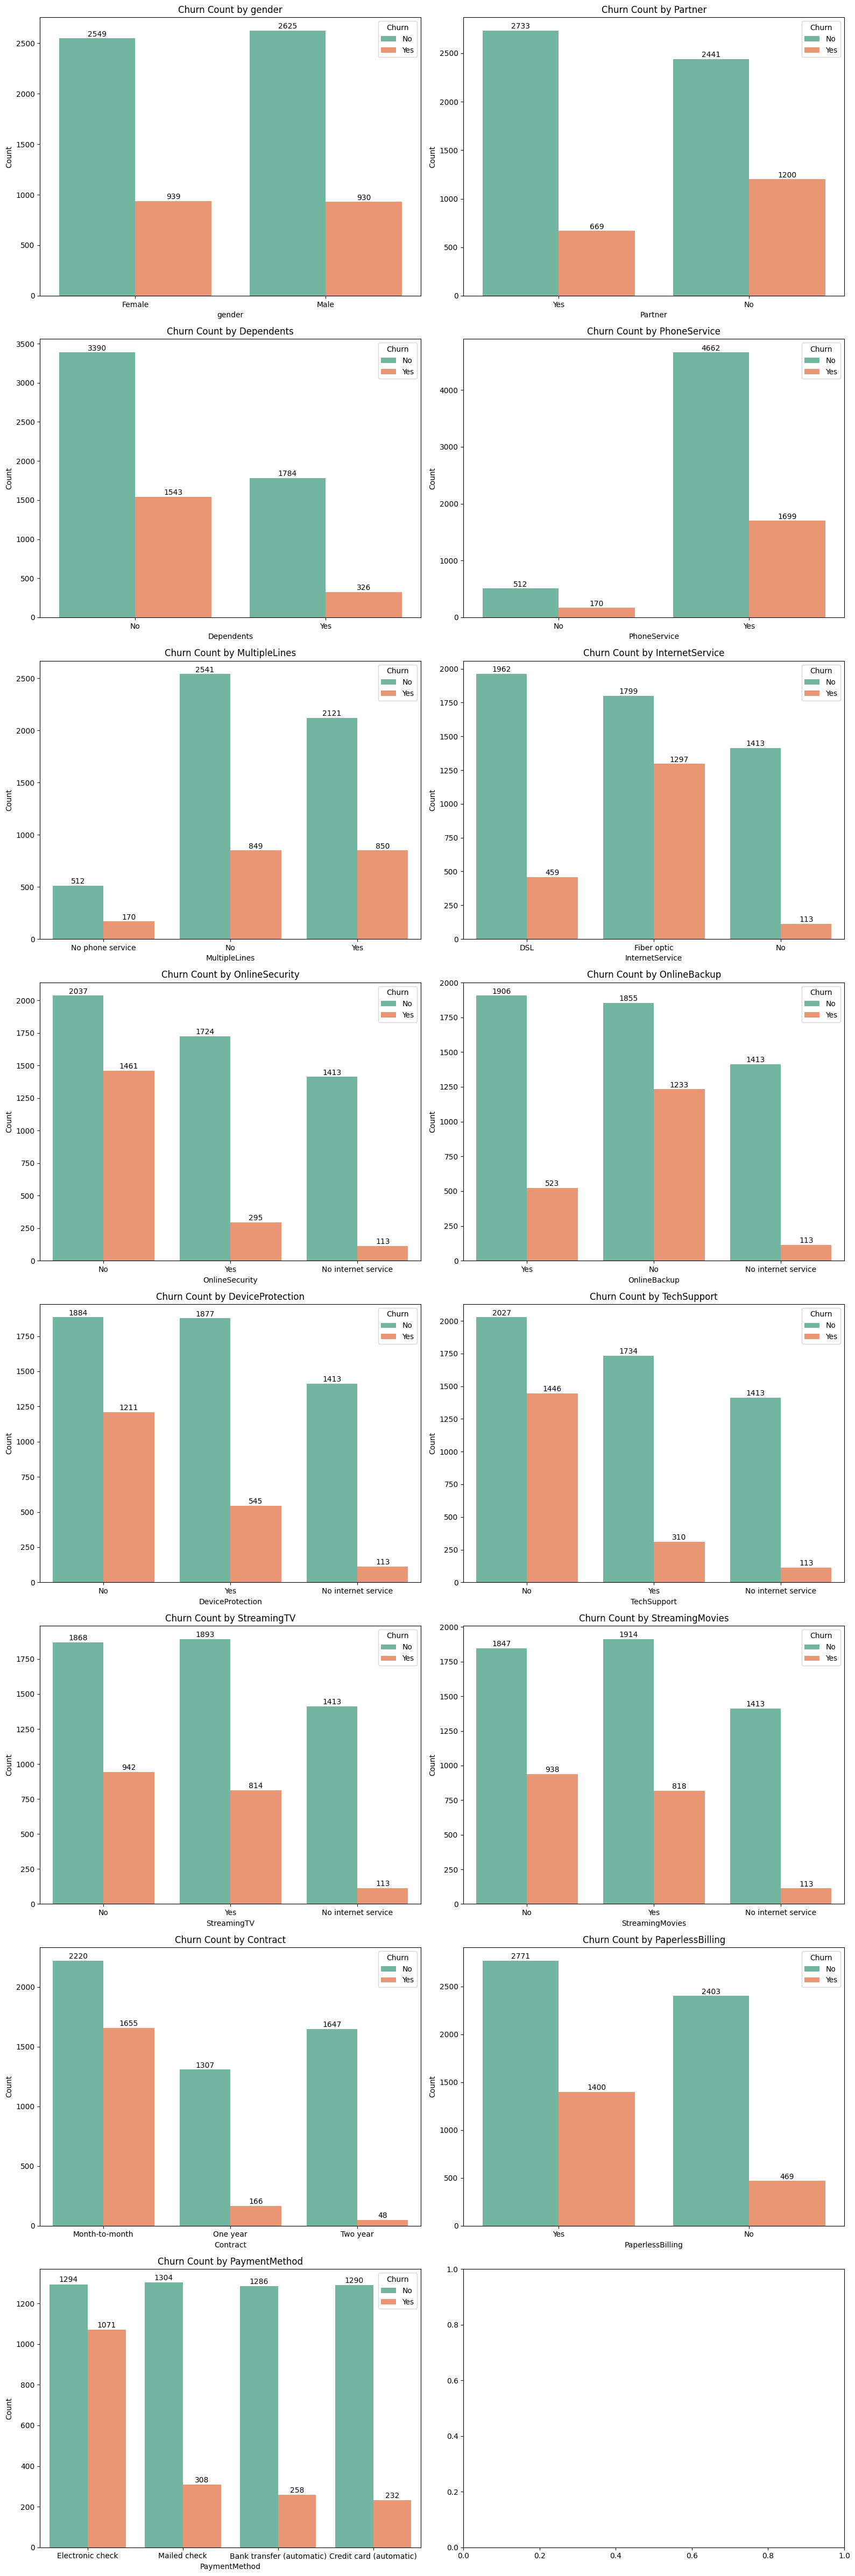

In [ ]:
# Churn analysis for each variable
category_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(16, 48))


for i, var in enumerate(category_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(x=var, hue='Churn', data=df, palette='Set2', ax=ax)

    ax.set_title(f'Churn Count by {var}')
    ax.set_ylabel('Count')

    ax.legend(title='Churn')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


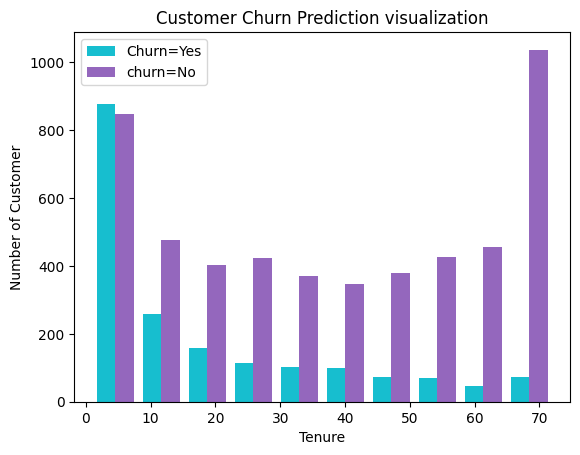

In [ ]:
# Visualising churn rate in relation to customer tenure
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C9','C4'],
         label=['Churn=Yes','churn=No'])

plt.legend()

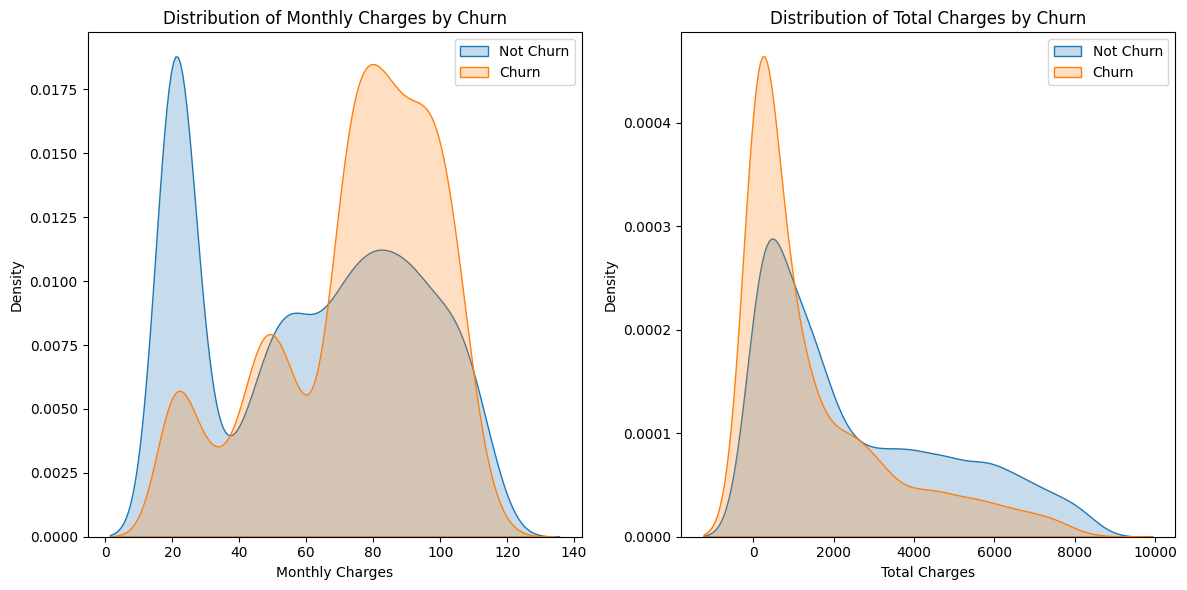

In [ ]:
# Visulising distribution of monthly and total charges of customesr in terms of churn
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'No'], fill=True, ax=ax[0])
sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'Yes'], fill=True, ax=ax[0])
ax[0].legend(["Not Churn","Churn"], loc='upper right')
ax[0].set_ylabel('Density')
ax[0].set_xlabel('Monthly Charges')
ax[0].set_title('Distribution of Monthly Charges by Churn')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.kdeplot(df['TotalCharges'][df["Churn"] == 'No'], fill=True, ax=ax[1])
sns.kdeplot(df['TotalCharges'][df["Churn"] == 'Yes'], fill=True, ax=ax[1])
ax[1].legend(["Not Churn","Churn"], loc='upper right')
ax[1].set_ylabel('Density')
ax[1].set_xlabel('Total Charges')
ax[1].set_title('Distribution of Total Charges by Churn')

plt.tight_layout()
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

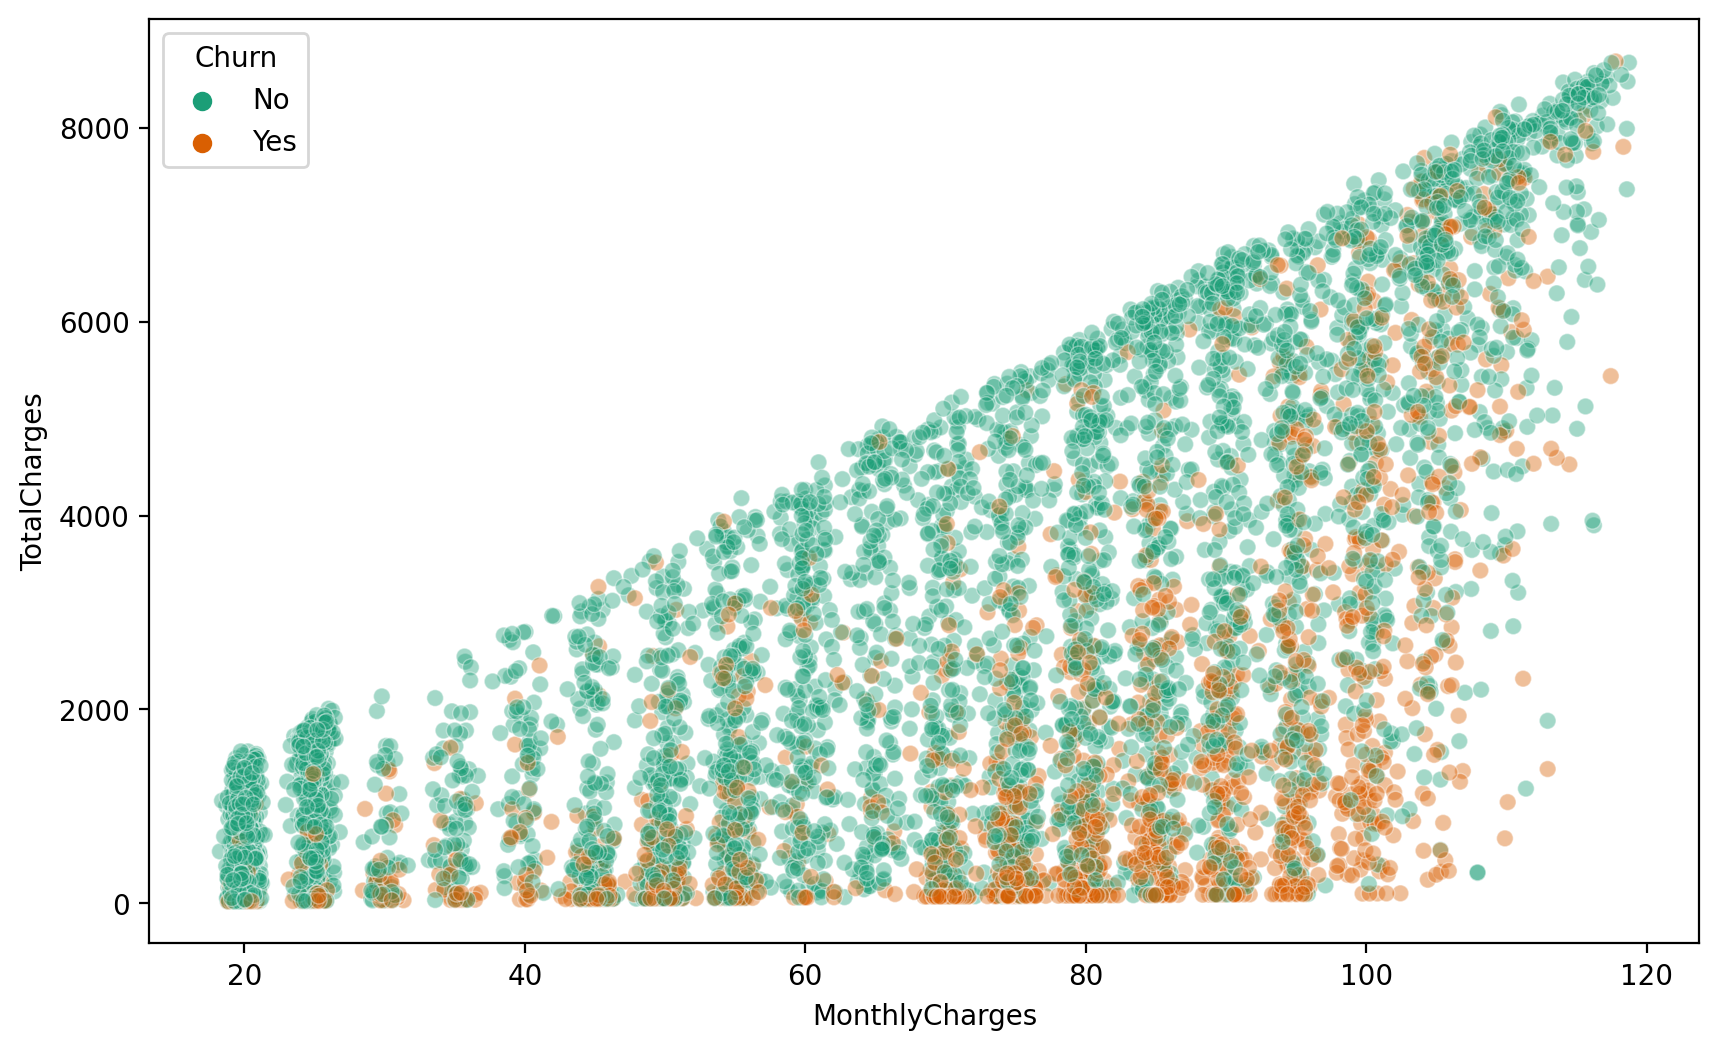

In [ ]:
# Plotting monthly charges churn rate using a scatter plot
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',
               alpha=0.4,linewidth=0.5, palette="Dark2")

In [ ]:
#When the MonthlyCharges is high and the tenure is not long, the TotalCharges will not be very large, which greatly increases the likelihood of customer churn. According to the charts, the longer the contract period, the less likely customers are to leave. Therefore, the company should reduce monthly expenses and extend contract durations to retain more customers.

<ipython-input-15-7d2a1dab1d88>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='tenure_group', y='MonthlyCharges', hue='Churn', ci=None)


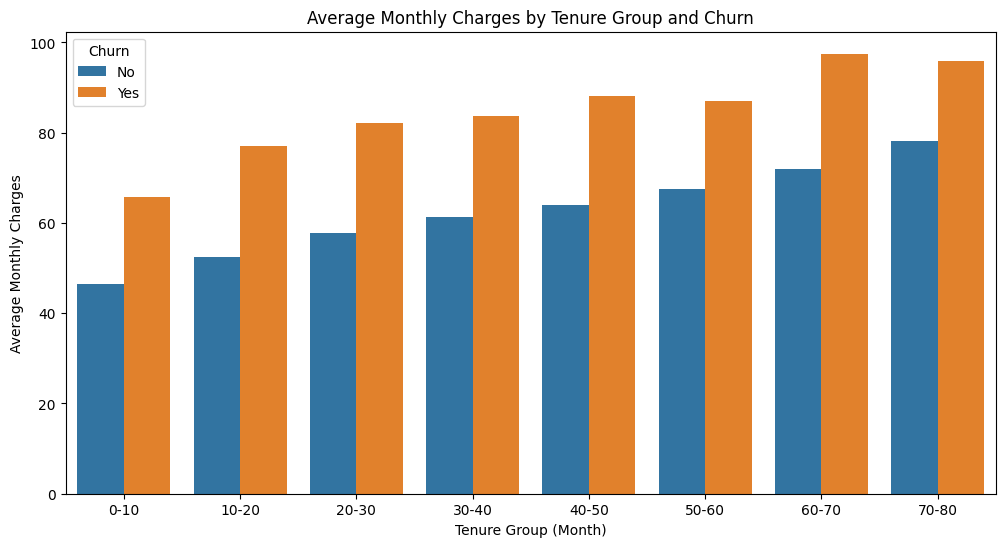

In [ ]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='tenure_group', y='MonthlyCharges', hue='Churn', ci=None)

plt.title('Average Monthly Charges by Tenure Group and Churn')
plt.xlabel('Tenure Group (Month)')
plt.ylabel('Average Monthly Charges')

plt.show()

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
# Converting binary variables to 1 and 0
yes_no_columns =['Partner','Dependents','PhoneService','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-17-b781334d9b04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-18-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [ ]:
# one hot encoding of non-binary variables
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',],dtype=float)

df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMo

In [ ]:
pd.set_option('display.max_columns', None)

df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
1603,1,0,0,0,15,1,64.65,994.55,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3395,0,0,0,0,62,1,90.70,5586.45,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4414,1,0,0,1,21,1,20.75,452.2,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4482,1,0,0,0,7,1,74.90,541.15,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5092,1,0,1,1,7,1,20.45,150.75,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6589,1,0,1,0,68,1,25.80,1911.5,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,0,0,1,0,58,1,20.75,1185.95,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5549,1,0,0,0,3,1,97.90,315.3,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3939,1,0,0,1,1,1,78.65,78.65,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5314,1,0,1,0,70,0,64.55,4504.9,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### Correlation Matrix


<ipython-input-22-110b6e8b3a62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df1.corr()['Churn'].sort_values(ascending=False)


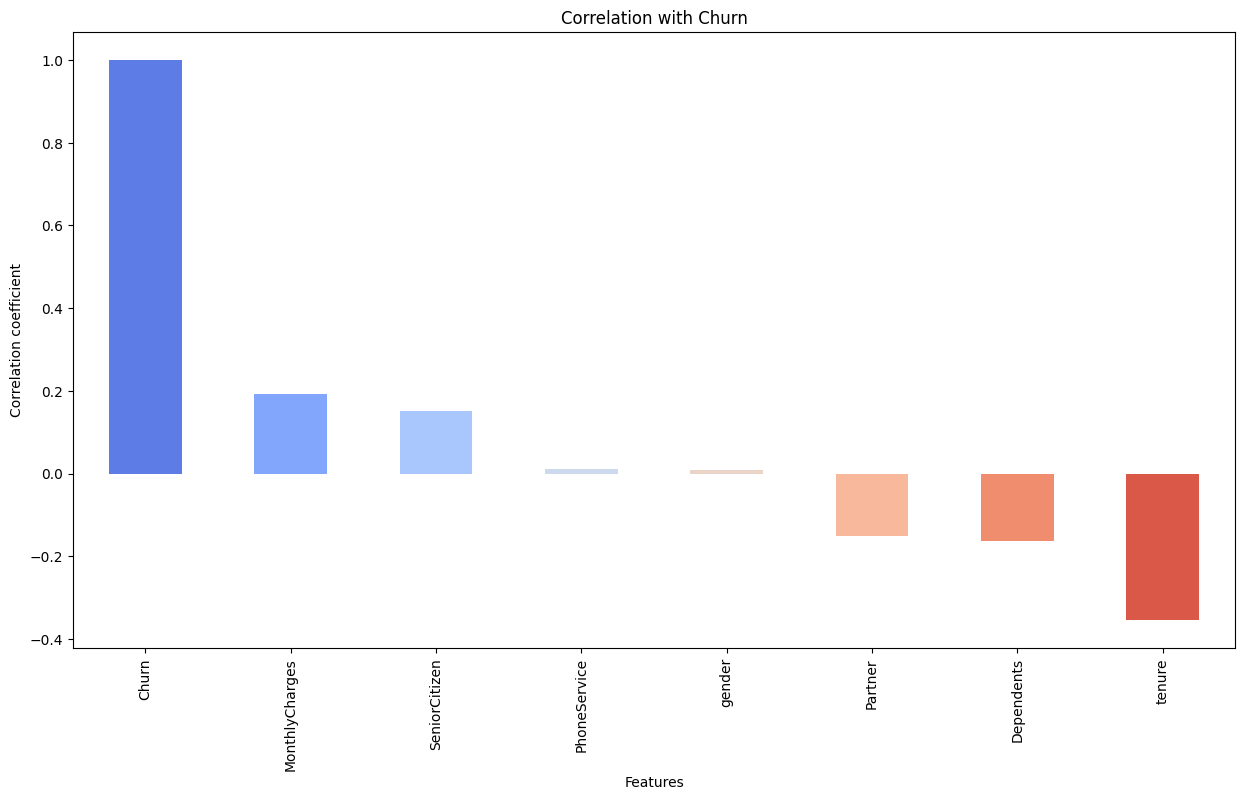

In [ ]:

corr_values = df1.corr()['Churn'].sort_values(ascending=False)


colors = sns.color_palette('coolwarm', len(corr_values))

plt.figure(figsize=(15, 8))

corr_values.plot(kind='bar', color=colors)

plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')

plt.show()


# Split to train and test sets

In [ ]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']


X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                   test_size=0.2,random_state=38)

# Model 1: Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)


print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1032
           1       0.61      0.60      0.61       375

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



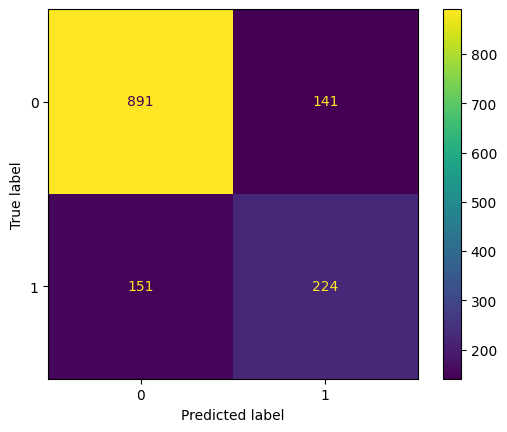

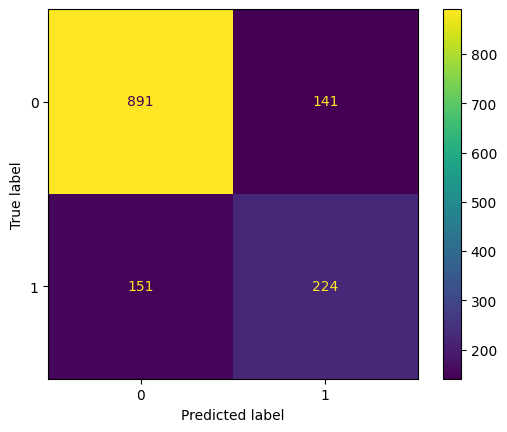

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [ ]:
# dt.feature_importances_
imp_feats = pd.DataFrame(data = dt.feature_importances_, index = X.columns,
                        columns=['Feature Imp'])
# Sort by Feature Importance
imp_feats = imp_feats.sort_values('Feature Imp')
# Drop Zero Importance Features
imp_feats = imp_feats[imp_feats['Feature Imp']>0]

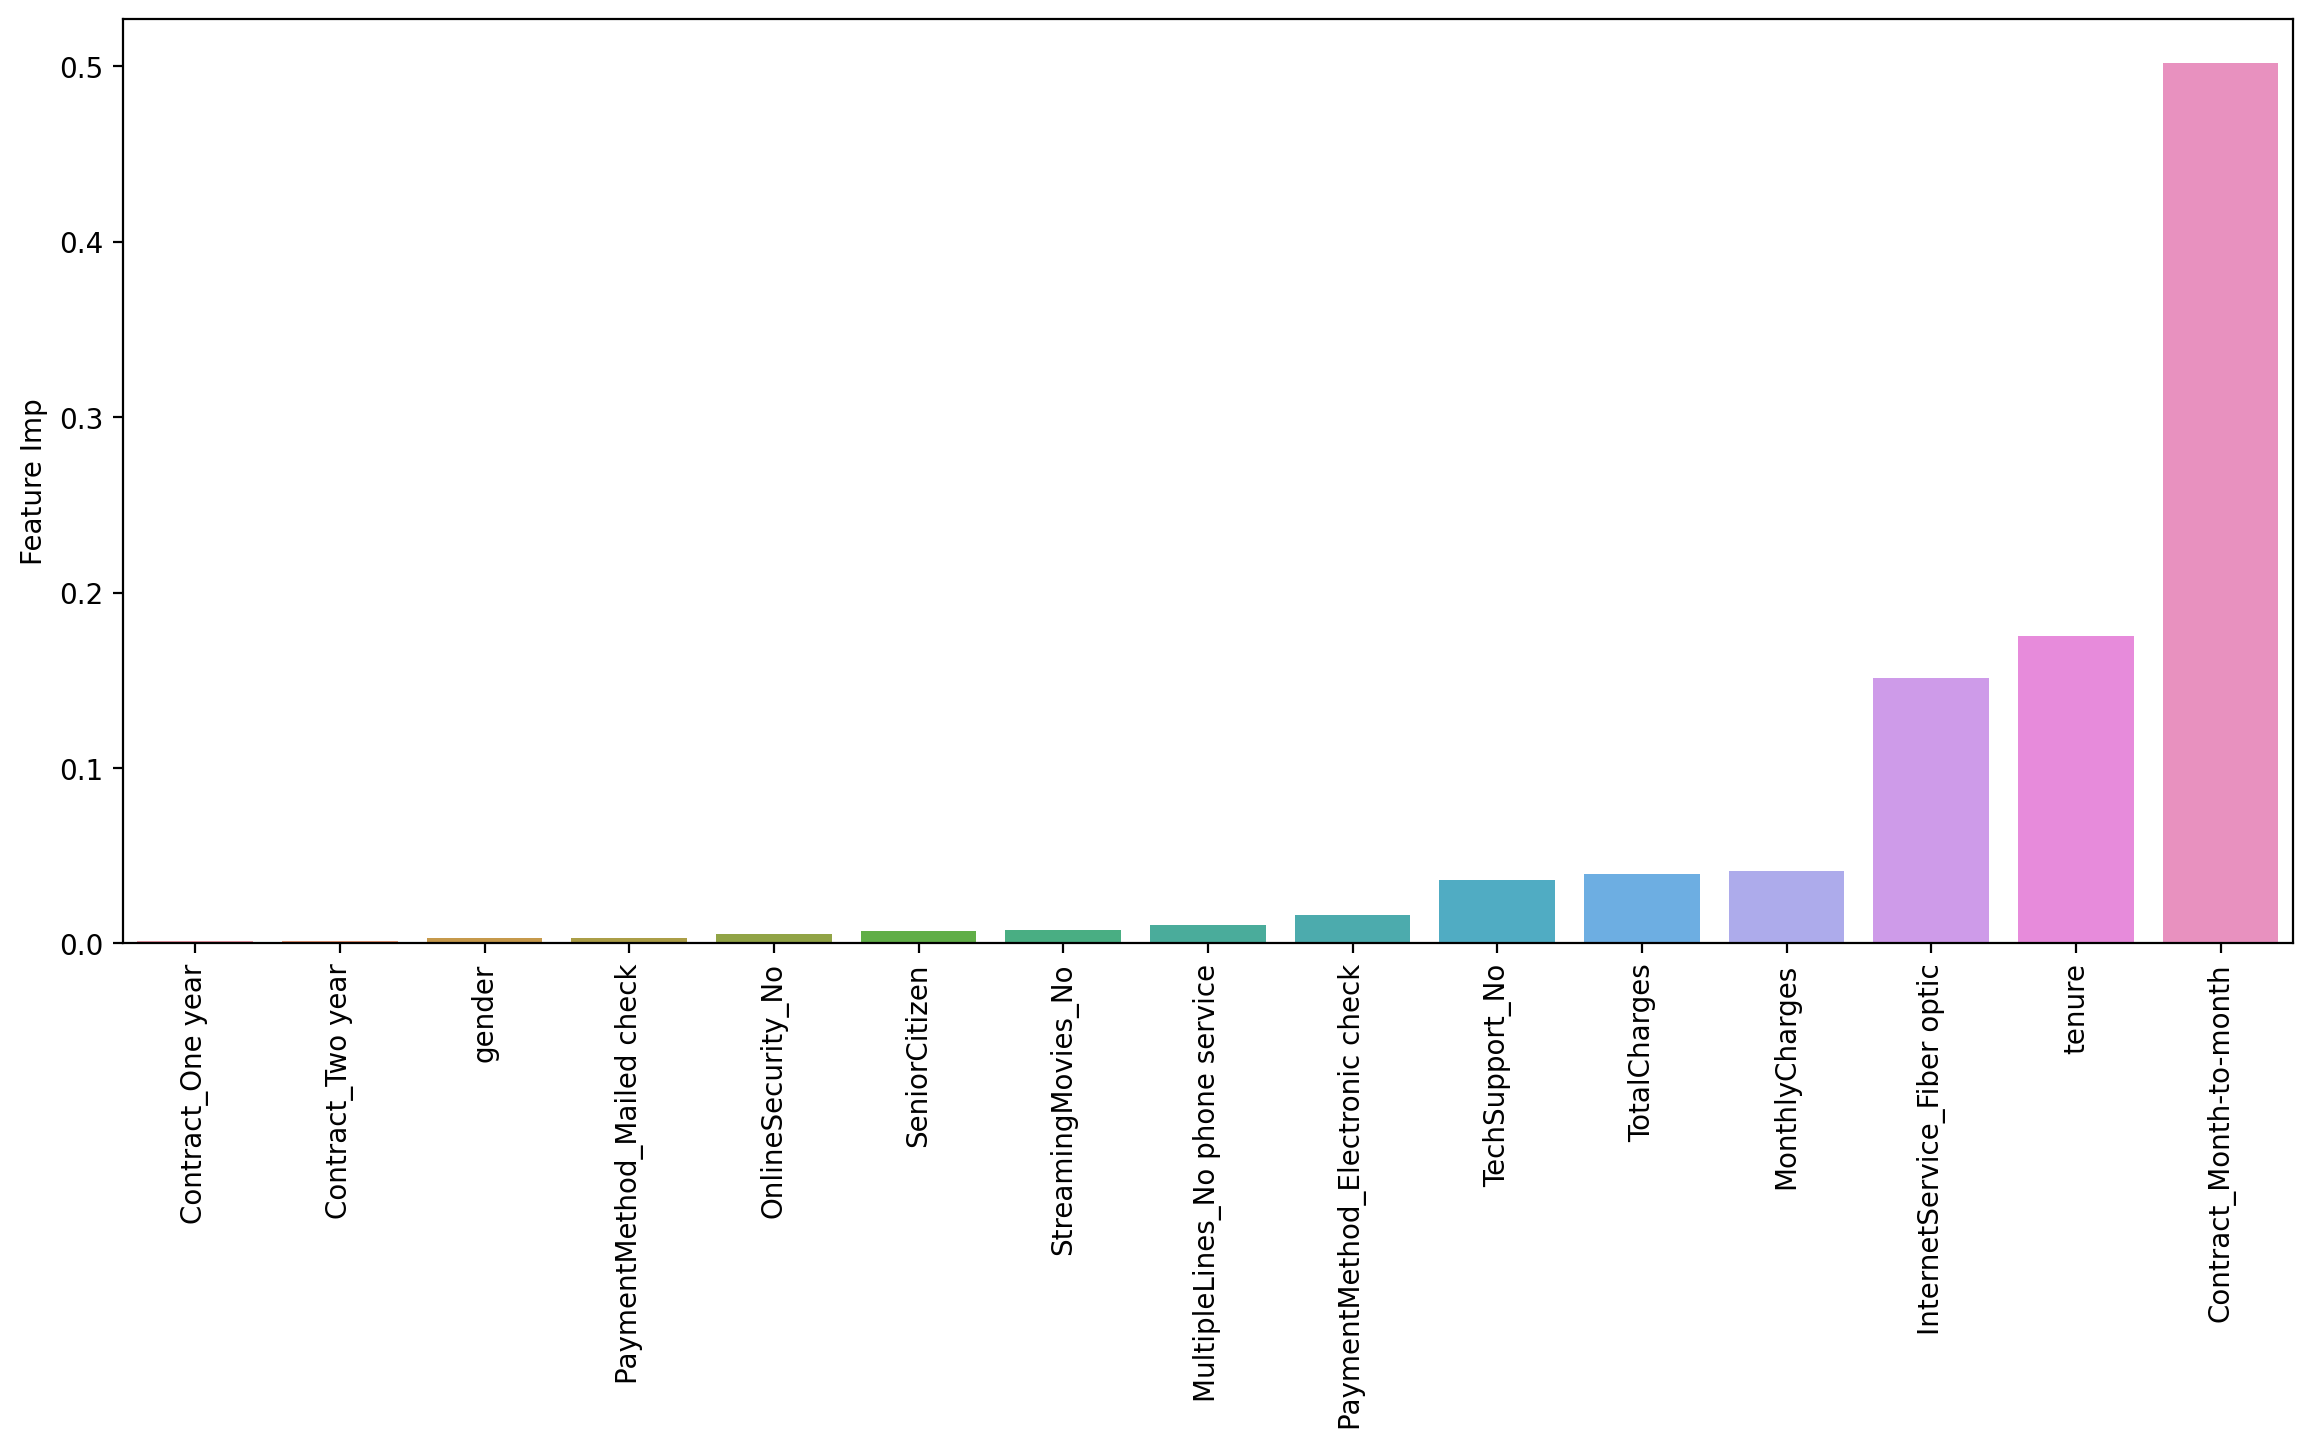

In [ ]:
# Evaluate the importance of each feature in the decision tree model.
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y = 'Feature Imp')
plt.xticks(rotation=90);

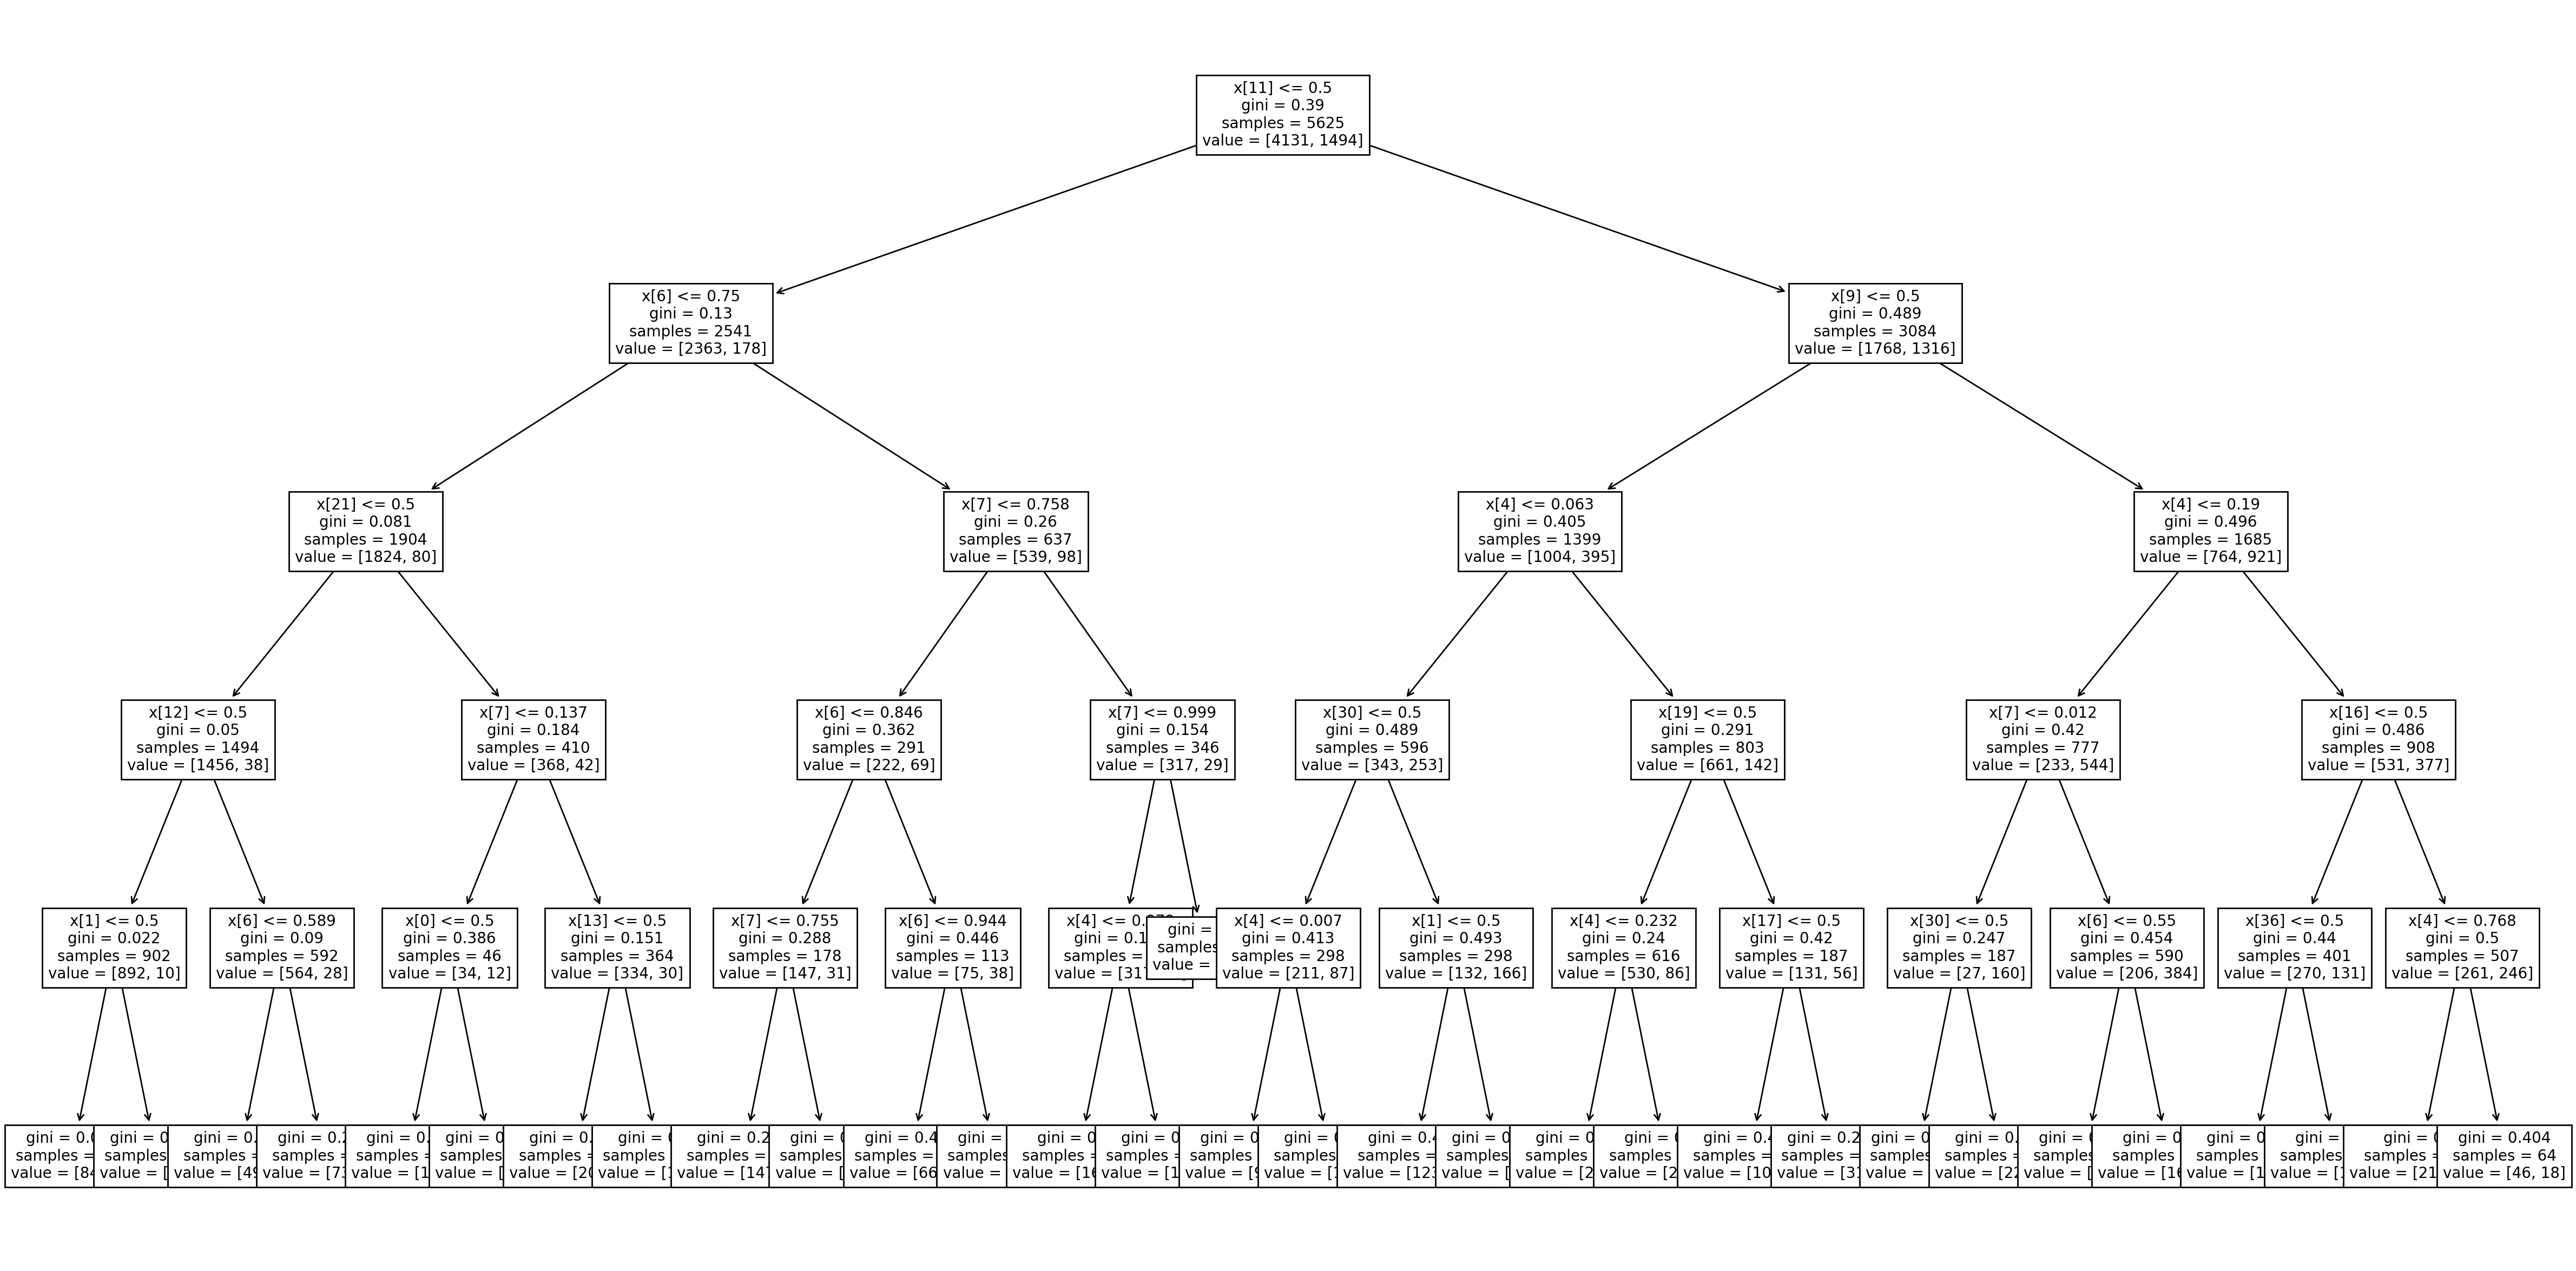

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15), dpi=200)

plot_tree(dt, fontsize=10)
plt.show()

# Model 2: Logistic regression

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred_log = model2.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1032
           1       0.66      0.58      0.62       375

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.80      0.81      0.81      1407



In [ ]:
print(f"Accuracy Score {accuracy_score(y_test,y_pred_log)}")

Accuracy Score 0.8095238095238095


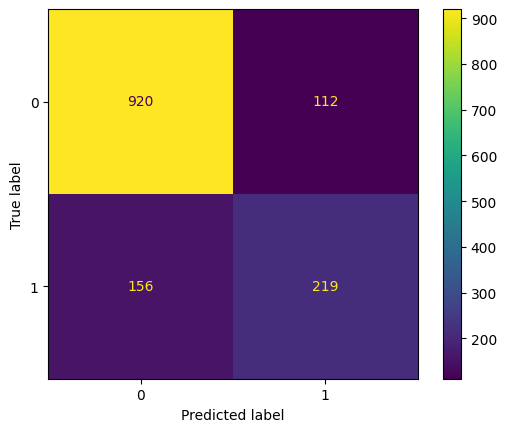

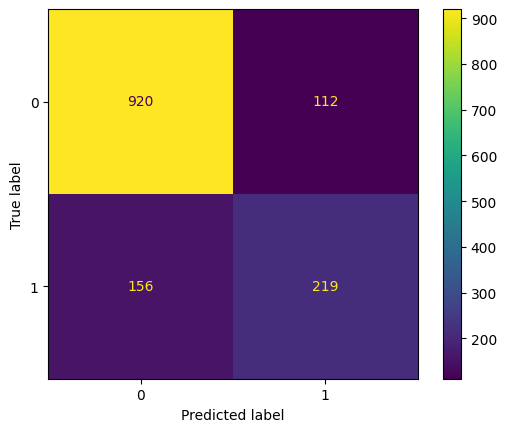

In [ ]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log)

In [ ]:
# parameters to improve logistic regression model

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','none'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'none', 'solver': 'saga'}


In [ ]:
#logistic regression model updated with parameters

model = LogisticRegression(C=0.01, penalty='none', solver='saga', max_iter=1000)
model.fit(X_train, y_train)
y_pred_log2 = model.predict(X_test)
print(classification_report(y_test, y_pred_log2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1032
           1       0.66      0.58      0.62       375

    accuracy                           0.81      1407
   macro avg       0.76      0.74      0.75      1407
weighted avg       0.80      0.81      0.81      1407



In [ ]:
print(f"Accuracy Score {accuracy_score(y_test,y_pred_log2)}")

Accuracy Score 0.8095238095238095


# Model 3: Support vector machine

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1032
           1       0.65      0.53      0.58       375

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



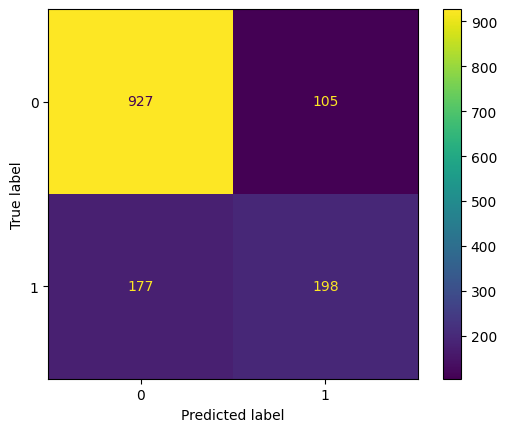

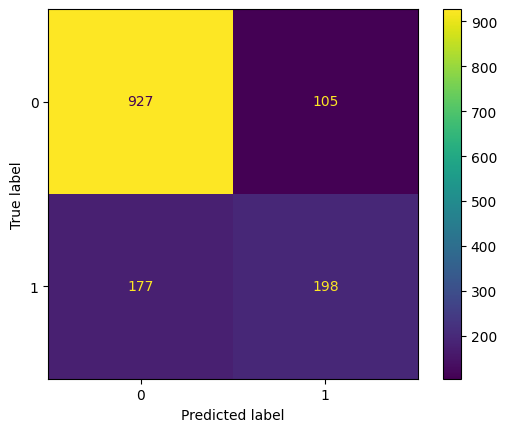

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm)

In [ ]:
# model updated with parameters performed better
svm_model = SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)
y_pred_svm2 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1032
           1       0.65      0.58      0.61       375

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



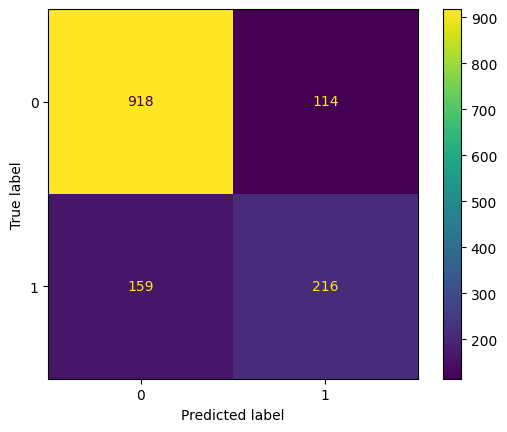

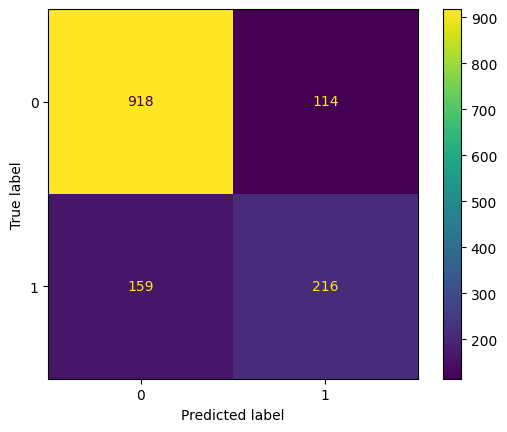

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm2)

# Method 4: XG boost

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_pred_XG = xgb_model.predict(X_test)

print("Classification Report (XG Boost):\n", classification_report(y_test, y_pred_XG))

Classification Report (XG Boost):
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1032
           1       0.57      0.53      0.55       375

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



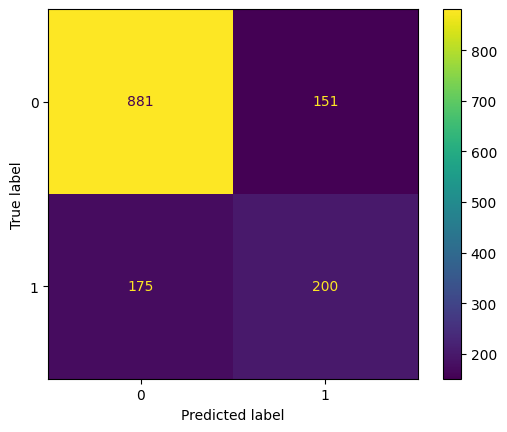

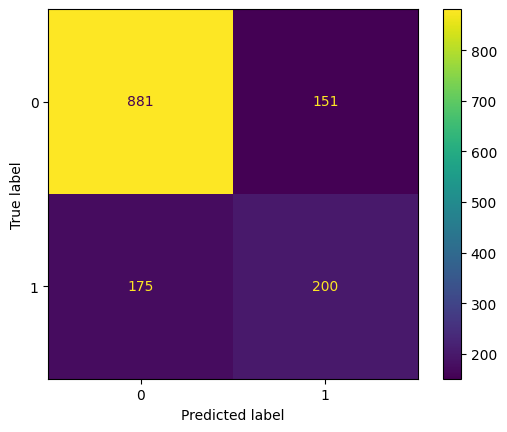

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_XG)

In [ ]:
# XG boost method with best hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
}

random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)
predictions = best_model.predict(X_test)
print("Classification Report (XG Boost with optimised hyperparameters):\n", classification_report(y_test, predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.5, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}
Test Accuracy: 0.798862828713575
Classification Report (XG Boost with optimised hyperparameters):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1032
           1       0.64      0.56      0.60       375

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



# Method 5: ANN

In [ ]:
model_ANN = keras.Sequential([
    keras.layers.Dense(20, input_shape=(41,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ANN.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.4820 - accuracy: 0.7596
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7957
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7979
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7972
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7986
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8025
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8032
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4163 - accura

In [ ]:
from sklearn.metrics import classification_report

y_pred_ann = model.predict(X_test)
y_pred_ann_binary = (y_pred_ann > 0.5).astype(int)
print("Classification Report (ANN):\n", classification_report(y_test, y_pred_ann_binary))

Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1032
           1       0.50      0.81      0.61       375

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407



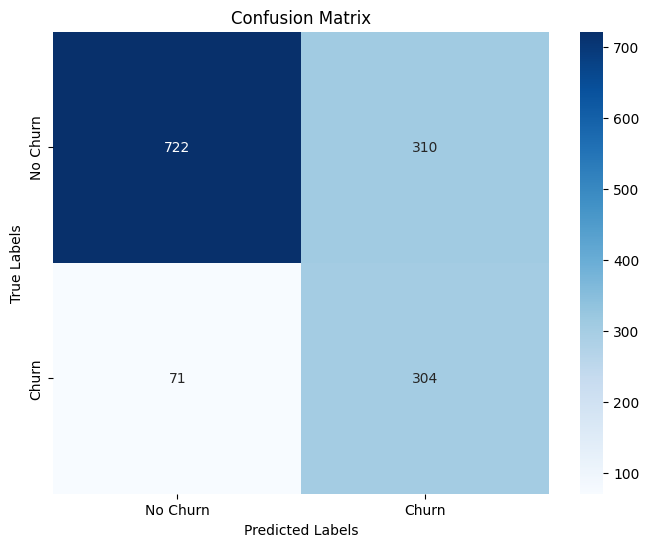

In [ ]:
conf_matrix_ANN = confusion_matrix(y_test, y_pred_ann_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ANN, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ANN model with customised hyperparameters
model_ANN_new = keras.Sequential([
    keras.layers.Dense(64, input_shape=(41,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_ANN_new.compile(optimizer=custom_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_ANN_new.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

test_loss, test_accuracy = model_ANN_new.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/100
141/141 [==============================] - 2s 7ms/step - loss: 0.5277 - accuracy: 0.7182 - val_loss: 0.4446 - val_accuracy: 0.7778
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4551 - accuracy: 0.7800 - val_loss: 0.4328 - val_accuracy: 0.7911
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4444 - accuracy: 0.7876 - val_loss: 0.4274 - val_accuracy: 0.8009
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4398 - accuracy: 0.7900 - val_loss: 0.4267 - val_accuracy: 0.8027
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4352 - accuracy: 0.7942 - val_loss: 0.4267 - val_accuracy: 0.7884
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.7909 - val_loss: 0.4259 - val_accuracy: 0.7920
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7976 - val_loss: 0.4218 - val_accuracy: 0.7982

In [ ]:
# Generate predictions and calculate the confusion matrix and classification report
y_pred_ann_new = model_ANN_new.predict(X_test)
y_pred_ann_binary_new = (y_pred_ann_new > 0.5).astype(int)

print("Classification Report (ANN New):\n", classification_report(y_test, y_pred_ann_binary_new))

44/44 [==============================] - 0s 1ms/step
Classification Report (ANN New):
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1032
           1       0.65      0.59      0.62       375

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.74      1407
weighted avg       0.80      0.81      0.80      1407



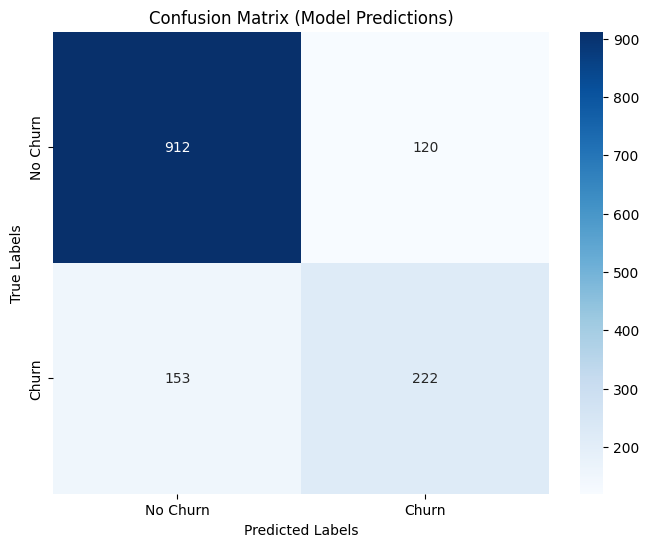

In [ ]:
# Confusion matrix

conf_matrix_ann_new = confusion_matrix(y_test, y_pred_ann_binary_new)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann_new, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Model Predictions)")
plt.show()